In [1]:
%pip install box-embeddings

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import numpy
from box_embeddings.parameterizations import BoxTensor, MinDeltaBoxTensor, SigmoidBoxTensor
from box_embeddings.modules.volume.volume import Volume
from box_embeddings.modules.intersection import Intersection
from box_embeddings.parameterizations.box_tensor import BoxFactory, BoxTensor
import matplotlib.pyplot as plt
import numpy as np
import random
import os

AllenNLP not available. Registrable won't work.


In [12]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

Types of boxes

In [3]:
from box_embeddings.parameterizations import BoxTensor, MinDeltaBoxTensor, SigmoidBoxTensor

tensor = torch.Tensor([[-1,-1],[2,2]])
tensor_1 = torch.Tensor([[-2,-2],[3,3]])
def create_box_tensor(tensor):
  box_tensor = BoxTensor(tensor)
  return box_tensor

def create_MinDelta_tensor(tensor):
  box_tensor = MinDeltaBoxTensor(tensor)
  return box_tensor

def create_Sigmoid_tensor(tensor):
  box_tensor = SigmoidBoxTensor(tensor)
  return box_tensor

def print_point(box_tensor):
  print("z: ",box_tensor.z)
  print("Z: ",box_tensor.Z)

box_tensor = create_box_tensor(tensor)
box_tensor_min = create_MinDelta_tensor(tensor)
box_tensor_sigmoid = create_Sigmoid_tensor(tensor)

box_tensor_1 = create_box_tensor(tensor_1)
box_tensor_min_1 = create_MinDelta_tensor(tensor_1)
box_tensor_sigmoid_1 = create_Sigmoid_tensor(tensor_1)

print("Box_normale")
print_point(box_tensor)
print("Box_min")
print_point(box_tensor_min)
print("Box_sigmoid")
print_point(box_tensor_sigmoid)

Box_normale
z:  tensor([-1., -1.])
Z:  tensor([2., 2.])
Box_min
z:  tensor([-1., -1.])
Z:  tensor([1.1269, 1.1269])
Box_sigmoid
z:  tensor([0.2689, 0.2689])
Z:  tensor([0.9129, 0.9129])


Types of volumes

In [4]:
from box_embeddings.modules.volume.volume import Volume
# torna valori in logaritmo
hard_volume = Volume(intersection_temperature=0, volume_temperature=0, log_scale=False)
soft_volume = Volume(intersection_temperature=0, volume_temperature=1.0, log_scale=False)
bessel = Volume(intersection_temperature=1.0, volume_temperature=1.0, log_scale=False)
print("box normale")
print("hard", hard_volume(box_tensor))
print("soft", soft_volume(box_tensor))
print("bessel", bessel(box_tensor))

print("box min")
print("hard", hard_volume(box_tensor_min))
print("soft", soft_volume(box_tensor_min))
print("bessel", bessel(box_tensor_min))

print("box sigmoid")
print("hard", hard_volume(box_tensor_sigmoid))
print("soft", soft_volume(box_tensor_sigmoid))
print("bessel", bessel(box_tensor_sigmoid))


box normale
hard tensor(9.)
soft tensor(9.2939)
bessel tensor(3.9689)
box min
hard tensor(4.5238)
soft tensor(5.0156)
bessel tensor(1.6724)
box sigmoid
hard tensor(0.4146)
soft tensor(1.1365)
bessel tensor(0.2210)


Types of intersection

In [6]:
from box_embeddings.modules.intersection import Intersection

# restituisce un box di intersezione 
hard_intersection = Intersection(intersection_temperature=0)
gumbel_intersection = Intersection(intersection_temperature=1.0)

print("intersezione stesso box normale")
volume = hard_volume(hard_intersection(box_tensor, box_tensor))
print_point(box_tensor)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor, box_tensor))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor, box_tensor))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor, box_tensor))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor, box_tensor))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor, box_tensor))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box normale
z:  tensor([-1., -1.])
Z:  tensor([2., 2.])
hard_volume, hard_int  tensor(9.)
hard_volume, gumbel_int  tensor(2.6040)
soft_volume, hard_int  tensor(9.2939)
soft_volume, gumbel_int  tensor(3.2232)
bessel_volume, hard_int  tensor(3.9689)
bessel_volume, gumbel_int  tensor(0.9005)


In [61]:
print("intersezione stesso box min")
volume = hard_volume(hard_intersection(box_tensor_min, box_tensor_min))
print_point(box_tensor_min)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor_min, box_tensor_min))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor_min, box_tensor_min))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor_min, box_tensor_min))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor_min, box_tensor_min))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor_min, box_tensor_min))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box min


NameError: name 'hard_intersection' is not defined

In [62]:
print("intersezione stesso box sigmoid")
volume = hard_volume(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print_point(box_tensor_sigmoid)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box sigmoid


NameError: name 'hard_intersection' is not defined

In [63]:
def extract_embeddings(boxes):
        list_box = []
        list_box.append(boxes.z.data.tolist())
        list_box.append(boxes.Z.data.tolist())
        return list_box

In [75]:
from torch.nn.modules.loss import L1Loss
from box_embeddings.modules.regularization import l2_side_regularizer
box_vol = Volume(volume_temperature=0.1, intersection_temperature=0.001)
box_int = Intersection(intersection_temperature=0.001)
import math
from torch import nn 

def rounded_box_vol(arg):
  #return torch.exp(box_vol(arg)).item()
  return torch.exp((box_vol(arg))).item()

def good_print(text, var):
  template = '|{:30}: {:.4f}|'.format(text, var)
  print(template)


def train(box_target, box_pos, box_neg_2, box_neg, optimizer, epochs=1):
  best_loss = float('inf')
  best_box_target = None
  best_box_pos = None
  best_box_neg = None
  volume_target = []
  volume_positive = []
  volume_negative_2 = []
  volume_negative = []
  volume_int_positive = []
  volume_int_negative_2 = []
  volume_int_negative = []

  target_list = []
  context_list = []
  context_list_2 = []
  negative_list = []
  
  print('|{:-^38}|'.format(''))

  for e in range(epochs):

    good_print('epoch (before backward):', e)
    print('|{:*^38}|'.format(''))
    good_print("volume parola target: ", rounded_box_vol(box_target))
    volume_target.append(rounded_box_vol(box_target))
    good_print("volume parola positive: ", rounded_box_vol(box_pos))
    volume_positive.append(rounded_box_vol(box_pos))
    good_print("volume parola negative_2: ", rounded_box_vol(box_neg_2))
    volume_negative_2.append(rounded_box_vol(box_neg_2))
    good_print("volume parola negative: ", rounded_box_vol(box_neg))
    volume_negative.append(rounded_box_vol(box_neg))
    print('|{:-^38}|'.format(''))
    good_print("volume int target-negative: " , rounded_box_vol(box_int(box_target, box_neg)))
    volume_int_negative.append(rounded_box_vol(box_int(box_target, box_neg)))
    good_print("volume int target-negative_2: " , rounded_box_vol(box_int(box_target, box_neg_2)))
    volume_int_negative_2.append(rounded_box_vol(box_int(box_target, box_neg_2)))
    good_print("volume int target-positive: " , rounded_box_vol(box_int(box_target, box_pos)))
    volume_int_positive.append(rounded_box_vol(box_int(box_target, box_pos)))
    

    optimizer.zero_grad() 
    


    loss = - ( box_vol(box_int(box_pos, box_target)) - (box_vol(box_target)+box_vol(box_pos)) )
    loss += ( box_vol(box_int(box_neg, box_target)) - (box_vol(box_target)+box_vol(box_neg)) )
    loss += ( box_vol(box_int(box_neg_2, box_target)) -  (box_vol(box_target)+ box_vol(box_neg_2)) ) 
    
     
    loss.backward()
    optimizer.step()

    target_list.append(extract_embeddings(box_target))
    context_list.append(extract_embeddings(box_pos))
    context_list_2.append(extract_embeddings(box_neg_2))
    negative_list.append(extract_embeddings(box_neg))

    print(len(context_list_2))

    if best_loss > loss.item():
            best_loss = loss.item()
            best_box_neg = box_neg
            best_box_pos = box_pos
            best_box_target = box_target
    print('|{:-^38}|'.format(''))

    good_print("Loss: ",loss.item())
    good_print("pos: ", ( box_vol(box_int(box_pos, box_target)) - (box_vol(box_target)+box_vol(box_pos)) ).item()) 
    good_print("neg: ", ( box_vol(box_int(box_neg, box_target)) - (box_vol(box_target)+box_vol(box_neg)) ).item()) 
    good_print("neg_2 :", ( box_vol(box_int(box_neg_2, box_target)) -  (box_vol(box_target)+box_vol(box_neg_2)) ).item())
    
    
    
    print('|{:*^38}|'.format(''))

    #plt.plot(lst_iter, lst_loss, '-b', label='loss')
    #plt.plot(lst_iter, lst_acc, '-r', label='accuracy')
  plt.figure(0, figsize=(10,6))
  x = [i for i in range(epochs)]
  plt.plot(x, volume_target, label = "Volume target")
  plt.plot(x, volume_positive, label = "Volume positive")
  plt.plot(x, volume_negative_2, label = "Volume neg_2")
  plt.plot(x, volume_negative, label = "Volume negative")
  plt.legend()
  plt.show()
  plt.figure(1, figsize=(10,6))
  plt.plot(x, volume_int_negative, label = "Volume int-neg")
  plt.plot(x, volume_int_positive, label = "Volume int-pos")
  plt.plot(x, volume_int_negative_2, label = "Volume int-neg_2")
  plt.legend()
  plt.show()

  return target_list, context_list, context_list_2, negative_list

In [76]:
# Initialization
data_x = torch.tensor([[-2.789, -5.342], [+2., +3.]], requires_grad=True)
box_target = SigmoidBoxTensor(data_x)

print("volume target", rounded_box_vol(box_target))

data_y = torch.tensor([[1, -3], [+1., +1]], requires_grad=True)
box_positive = SigmoidBoxTensor(data_y)

print("volume positive", rounded_box_vol(box_positive))

data_k = torch.tensor([[1.123, 6.0], [-2., 0.5]], requires_grad=True)
box_negative_2 = SigmoidBoxTensor(data_k)


print("volume neg_2", rounded_box_vol(box_negative_2))

data_z = torch.tensor([[+1., +1.5], [-0., -3.]], requires_grad=True)
box_negative = SigmoidBoxTensor(data_z)


print("volume negative", rounded_box_vol(box_negative))

volume target 0.7846410274505615
volume positive 0.14511699974536896
volume neg_2 0.005863008089363575
volume negative 0.011461207643151283


In [77]:

volume_ = Volume(volume_temperature=0.1, intersection_temperature=0.0001)
intersection_ = Intersection(intersection_temperature=0.0001)

print("volume target ", torch.exp(volume_(box_target)).item())
print("volume negative_2 ",torch.exp(volume_(box_negative_2)).item())
print("volume positive", torch.exp(volume_(box_positive)).item())
print("volume negative ", torch.exp(volume_(box_negative)).item())

volumes = volume_(intersection_(box_positive, box_target))

volumes_2 = volume_(intersection_(box_negative_2, box_target))
volumes_3 = volume_(intersection_(box_negative, box_target))
print("volume itersezione pos_target ", torch.exp(volumes).item())
print("volume intersezione neg_2 target ", torch.exp(volumes_2).item())
print("volume intersezione neg_target ", torch.exp(volumes_3).item())

volume target  0.7864863872528076
volume negative_2  0.0059485770761966705
volume positive 0.1459677815437317
volume negative  0.01160652656108141
volume itersezione pos_target  0.12221883982419968
volume intersezione neg_2 target  0.004195076879113913
volume intersezione neg_target  0.011606532149016857


|--------------------------------------|
|epoch (before backward):      : 0.0000|
|**************************************|
|volume parola target:         : 0.7846|
|volume parola positive:       : 0.1451|
|volume parola negative_2:     : 0.0059|
|volume parola negative:       : 0.0115|
|--------------------------------------|
|volume int target-negative:   : 0.0115|
|volume int target-negative_2: : 0.0041|
|volume int target-positive:   : 0.1214|
1
|--------------------------------------|
|Loss:                         : 0.0707|
|pos:                          : 0.1998|
|neg:                          : 0.1998|
|neg_2 :                       : -0.3853|
|**************************************|
|epoch (before backward):      : 1.0000|
|**************************************|
|volume parola target:         : 0.8189|
|volume parola positive:       : 0.1690|
|volume parola negative_2:     : 0.0058|
|volume parola negative:       : 0.0171|
|--------------------------------------|
|volume int t

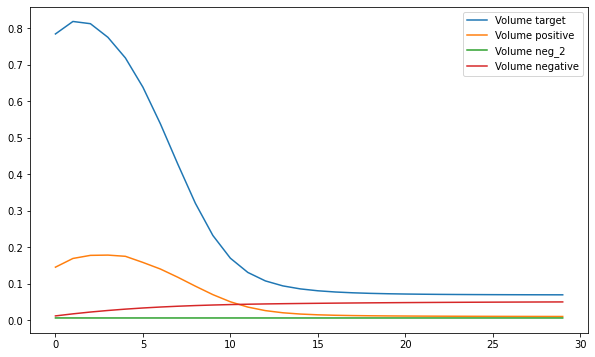

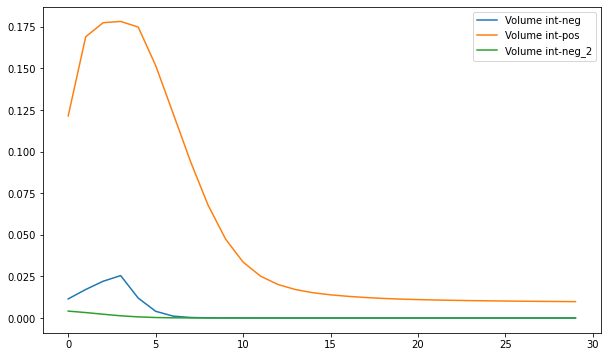

In [78]:
# Training function
learning_rate = 0.5

# Train
seed_everything(12345)
optimizer = torch.optim.Adam([data_x, data_y, data_k, data_z], lr=learning_rate)
epochs = 30
target_list, context_list, context_list_2, negative_list = train(box_target, box_positive, box_negative_2, box_negative, optimizer, epochs=epochs)


In [79]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, interactive
from copy import copy
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

def load_boxes(myboxes, ty, color):

  import matplotlib._color_data as mcd
  import matplotlib.patches as mpatch
  colors = [name for name in mcd.CSS4_COLORS
            if "xkcd:" + name in mcd.XKCD_COLORS]

  list_ = []
  for i,box in enumerate(myboxes):
    list_epoch = []
    rect = patches.Rectangle((box[0][0], box[0][1]), 
                            box[1][0] - box[0][0], 
                            box[1][1] - box[0][1], 
                            facecolor=color, edgecolor = color, lw=3, label=ty, alpha=1)
    
    list_.append(rect)
  return list_

list_targets = load_boxes(target_list, "target", "red")
print(len(list_targets))
list_contexts_pos = load_boxes(context_list, "positive", "green")
list_contexts_pos_2 = load_boxes(context_list_2, "negative_2", "brown")
list_contexts_neg = load_boxes(negative_list, "negative", "black")

def f2(epoch = (0, epochs-1, 1)):

    fig, ax = plt.subplots(figsize=(30, 10))
    plt.xlim([0, +1])
    plt.ylim([0, +1])
   
    new_c=copy(list_targets[epoch])
    new_pos=copy(list_contexts_pos[epoch])
    new_pos_2=copy(list_contexts_pos_2[epoch])
    new_neg=copy(list_contexts_neg[epoch])
      
    ax.add_patch(new_c)
    ax.add_patch(new_pos)
    ax.add_patch(new_pos_2)
    ax.add_patch(new_neg)
    ax.legend()


interact(f2);

30


interactive(children=(IntSlider(value=14, description='epoch', max=29), Output()), _dom_classes=('widget-inter…

In [ ]:
%pip install torchtext